In [51]:
import os

%matplotlib inline
import string
import sys
import seaborn as sn

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

%matplotlib inline
import string
import sys
from collections import deque

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import statistics

sys.path.append("code/.")
from sklearn import datasets
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import average_precision_score
from catboost import CatBoostClassifier, CatBoostRegressor
from lightgbm.sklearn import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import StackingClassifier
import eli5
import shap

# Predicting player home runs based on metric data using Machine Learning
## Matthew Gillies
#### Data from https://www.kaggle.com/datasets/mattop/mlb-batting-exit-velocity-data-2015-2022

In [3]:
data = pd.read_csv("/Users/matthewgillies/EVDATA", index_col = 0)
data.head()

,year,HR/AB,batted_ball_events,launch_angle,sweet_spot_percentage,max_ev,average_ev,fly_ball_line_drive_ev,ground_ball_ev,max_distance,average_distance,average_homerun,hard_hit_95mph+,hard_hit_percentage,hard_hit_swing_percentage,total_barrels,barrels_batted_balls_percentage,barrels_plate_appearance_percentage
player,,,,,,,,,,,,,,,,,,
"Blackmon, Charlie",2022,0.030189,388,12.0,36.6,109.5,86.1,90.1,82.5,453,160,409.0,119,30.7,12.5,19,4.9,3.7
"McCutchen, Andrew",2022,0.033010,353,13.6,34.6,110.6,89.2,93.1,85.7,428,168,390.0,141,39.9,15.6,27,7.6,5.5
"Turner, Justin",2022,0.027778,331,19.0,40.2,108.9,89.4,91.8,86.6,414,191,392.0,133,40.2,15.7,27,8.2,6.0
"Andrus, Elvis",2022,0.031776,351,12.7,28.8,109.9,87.9,90.7,88.0,430,153,383.0,117,33.3,14.4,13,3.7,2.8
"Santana, Carlos",2022,0.044084,284,15.5,31.0,111.3,90.5,93.3,89.5,434,169,400.0,124,43.7,17.4,23,8.1,5.6


In [4]:
data.isna().any()

year                                   False
HR/AB                                   True
batted_ball_events                     False
launch_angle                           False
sweet_spot_percentage                  False
max_ev                                 False
average_ev                             False
fly_ball_line_drive_ev                 False
ground_ball_ev                         False
max_distance                           False
average_distance                       False
average_homerun                         True
hard_hit_95mph+                        False
hard_hit_percentage                    False
hard_hit_swing_percentage              False
total_barrels                          False
barrels_batted_balls_percentage        False
barrels_plate_appearance_percentage    False
dtype: bool

In [5]:
data = data.dropna()

### Data splitting with 80/20 split

In [6]:
X = data.drop(columns = "HR/AB")
y = data["HR/AB"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 123)
X_train.head()

,year,batted_ball_events,launch_angle,sweet_spot_percentage,max_ev,average_ev,fly_ball_line_drive_ev,ground_ball_ev,max_distance,average_distance,average_homerun,hard_hit_95mph+,hard_hit_percentage,hard_hit_swing_percentage,total_barrels,barrels_batted_balls_percentage,barrels_plate_appearance_percentage
player,,,,,,,,,,,,,,,,,
"Donaldson, Josh",2022,278,12.5,35.3,111.7,91.0,95.4,86.6,429,165,399.0,120,43.3,13.9,28,10.1,6.1
"Rengifo, Luis",2022,318,10.6,33.6,109.3,86.9,90.8,85.7,434,149,395.0,108,34.0,13.5,14,4.4,3.5
"Profar, Jurickson",2018,440,12.4,33.6,112.2,87.3,91.7,84.4,436,168,403.0,140,31.8,12.3,22,5.0,3.7
"Cain, Lorenzo",2017,486,10.2,32.1,112.0,89.1,92.2,88.2,436,173,399.0,173,35.6,14.0,17,3.5,2.6
"Odor, Rougned",2017,449,15.9,27.2,112.4,89.1,94.2,85.6,466,180,395.0,164,36.6,12.9,27,6.0,4.1


### Exploratory Data Analysis

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 760 entries, Donaldson, Josh to Rizzo, Anthony
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   year                                 760 non-null    int64  
 1   batted_ball_events                   760 non-null    int64  
 2   launch_angle                         760 non-null    float64
 3   sweet_spot_percentage                760 non-null    float64
 4   max_ev                               760 non-null    float64
 5   average_ev                           760 non-null    float64
 6   fly_ball_line_drive_ev               760 non-null    float64
 7   ground_ball_ev                       760 non-null    float64
 8   max_distance                         760 non-null    int64  
 9   average_distance                     760 non-null    int64  
 10  average_homerun                      760 non-null    float64
 11  hard_hit_95m

Entirely numeric dataset (besides Name)

In [8]:
X_train.describe()

,year,batted_ball_events,launch_angle,sweet_spot_percentage,max_ev,average_ev,fly_ball_line_drive_ev,ground_ball_ev,max_distance,average_distance,average_homerun,hard_hit_95mph+,hard_hit_percentage,hard_hit_swing_percentage,total_barrels,barrels_batted_balls_percentage,barrels_plate_appearance_percentage
count,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000
mean,2018.425000,387.190789,12.702105,33.884079,110.945789,89.000921,92.966316,86.048947,438.705263,173.393421,398.643421,145.631579,38.139868,14.675658,28.755263,7.711447,5.238553
std,2.260891,105.585683,4.439898,3.937787,3.118665,2.187372,2.533880,2.582004,19.220446,20.076578,10.437995,46.125293,7.851715,2.930104,16.001255,4.117662,2.482508
min,2015.000000,99.000000,-0.100000,18.500000,102.700000,80.500000,83.300000,78.100000,365.000000,117.000000,344.000000,27.000000,11.200000,4.500000,0.000000,0.000000,0.000000
25%,2016.750000,351.000000,9.875000,31.200000,109.000000,87.700000,91.400000,84.300000,426.000000,160.000000,393.000000,120.000000,33.600000,12.800000,16.000000,4.775000,3.400000
50%,2018.000000,404.000000,12.900000,33.800000,110.800000,89.100000,93.000000,86.100000,439.000000,174.000000,399.000000,152.000000,38.700000,14.700000,28.000000,7.400000,5.200000
75%,2020.000000,457.000000,15.625000,36.400000,112.900000,90.300000,94.500000,87.900000,451.000000,188.000000,405.000000,178.000000,43.200000,16.500000,38.000000,10.100000,6.800000
max,2022.000000,580.000000,26.800000,49.200000,122.200000,95.900000,100.500000,93.400000,499.000000,234.000000,429.000000,274.000000,62.200000,23.700000,91.000000,26.700000,15.800000


In [9]:
corr_matrix = X_train.corr()
plt.figure(figsize = (100,100))
plt.rcParams.update({'font.size': 50})
sn.heatmap(corr_matrix, annot = True)

<AxesSubplot: >

There are many strong correlations between features, with the largest correlation being between hard hit % and exit velocity metrics. This is expected as many of the features measure very similar metrics

In [10]:
sorted_mat = corr_matrix.unstack().sort_values()
print(sorted_mat[0:20])

year                                 batted_ball_events                    -0.392786
batted_ball_events                   year                                  -0.392786
                                     barrels_batted_balls_percentage       -0.253467
barrels_batted_balls_percentage      batted_ball_events                    -0.253467
hard_hit_percentage                  batted_ball_events                    -0.203689
batted_ball_events                   hard_hit_percentage                   -0.203689
                                     fly_ball_line_drive_ev                -0.196114
fly_ball_line_drive_ev               batted_ball_events                    -0.196114
ground_ball_ev                       sweet_spot_percentage                 -0.195072
sweet_spot_percentage                ground_ball_ev                        -0.195072
barrels_plate_appearance_percentage  batted_ball_events                    -0.194401
batted_ball_events                   barrels_plate_appearance_per

Many of the lowest correlations are including the year column, which is expected as the year should have minimal correlation (besides the increase/decrease of home runs from year to year). Ground ball exit velocity also seems to have many negative correlations, which is likely due to the fact that ground ball exit velocity is not representative of many of the metrics describing well-hit balls. 

array([[<AxesSubplot: title={'center': 'year'}>,
        <AxesSubplot: title={'center': 'batted_ball_events'}>,
        <AxesSubplot: title={'center': 'launch_angle'}>,
        <AxesSubplot: title={'center': 'sweet_spot_percentage'}>],
       [<AxesSubplot: title={'center': 'max_ev'}>,
        <AxesSubplot: title={'center': 'average_ev'}>,
        <AxesSubplot: title={'center': 'fly_ball_line_drive_ev'}>,
        <AxesSubplot: title={'center': 'ground_ball_ev'}>],
       [<AxesSubplot: title={'center': 'max_distance'}>,
        <AxesSubplot: title={'center': 'average_distance'}>,
        <AxesSubplot: title={'center': 'average_homerun'}>,
        <AxesSubplot: title={'center': 'hard_hit_95mph+'}>],
       [<AxesSubplot: title={'center': 'hard_hit_percentage'}>,
        <AxesSubplot: title={'center': 'hard_hit_swing_percentage'}>,
        <AxesSubplot: title={'center': 'total_barrels'}>,
        <AxesSubplot: title={'center': 'barrels_batted_balls_percentage'}>],
       [<AxesSubplot: t

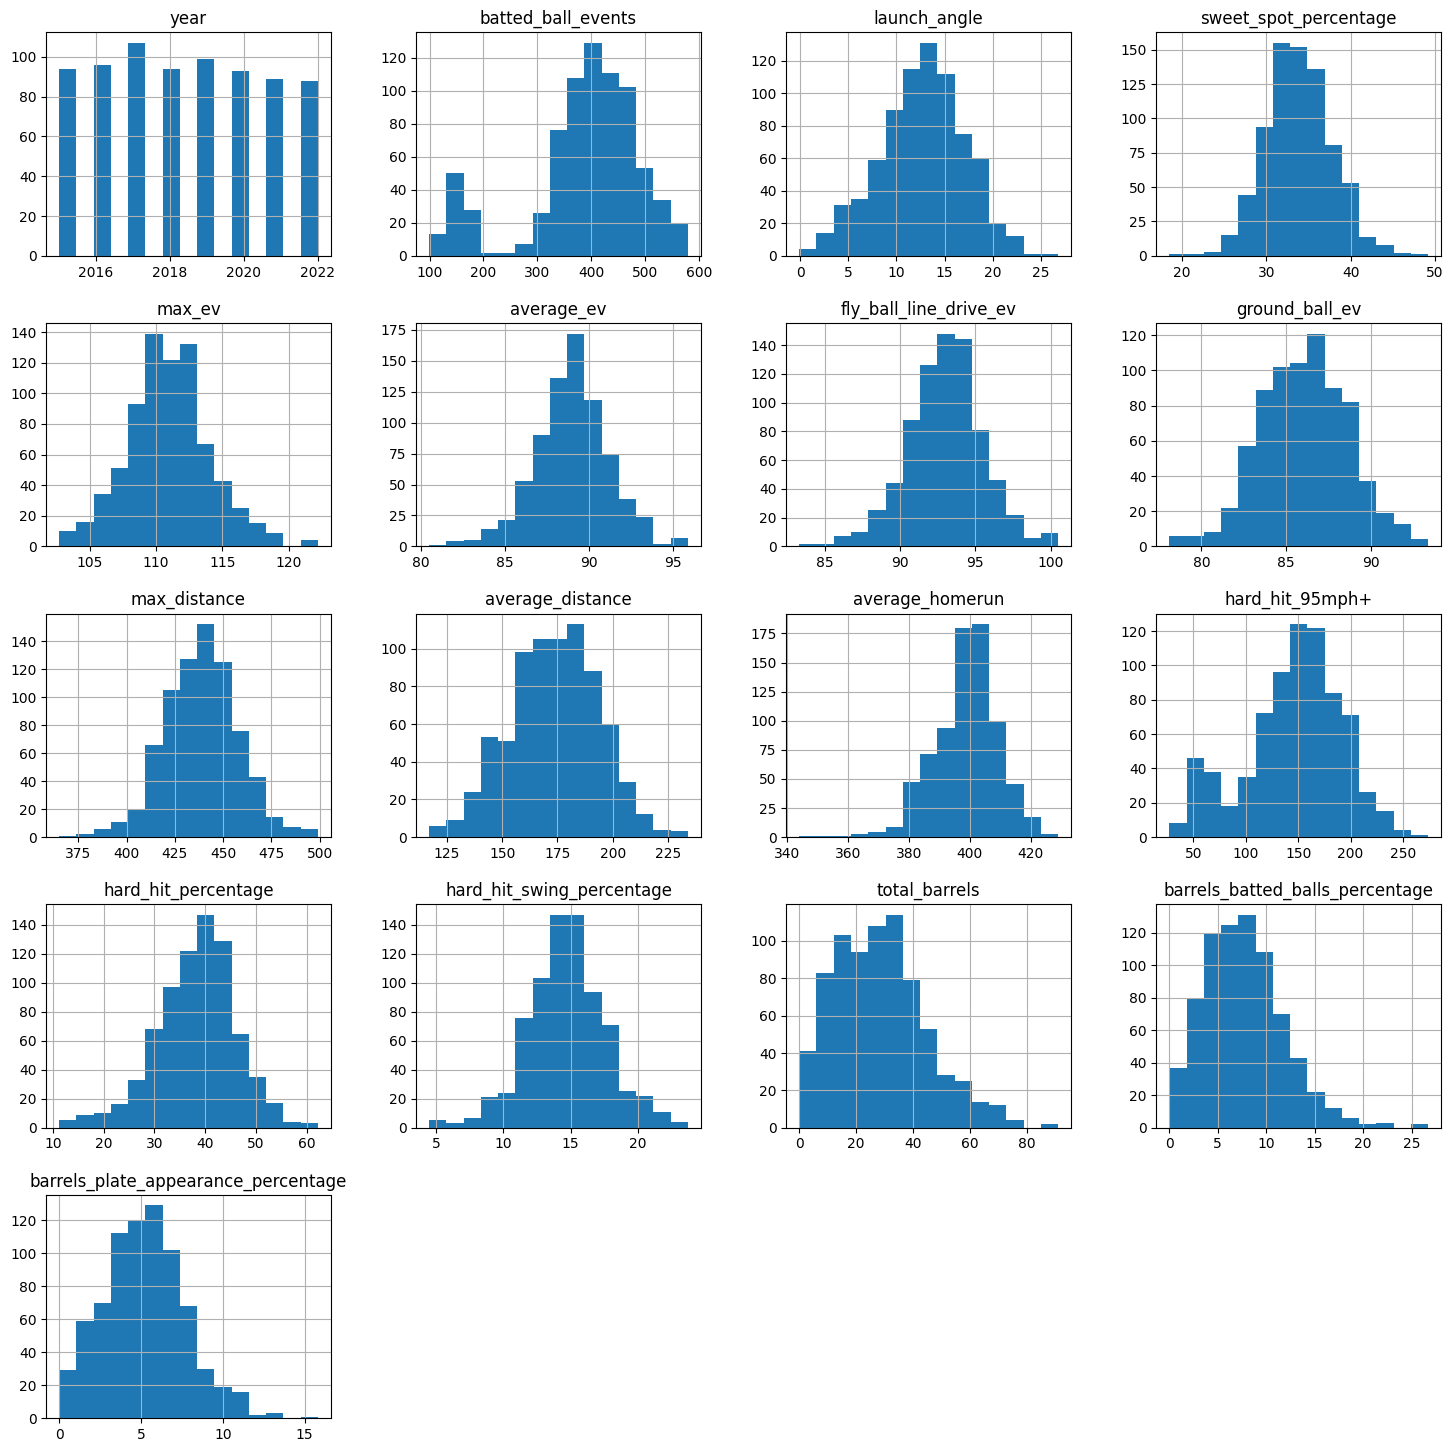

In [11]:
plt.rcParams.update({'font.size': 10})
X_train.hist(bins = 15, figsize = (18,18))

It appears that most of the features follow a relatively normal distribution, with total barrels being further left-skewed. This is likely due to the fact that this feature has not been converted to a per at bat or per game rate, as injuries cause many players to not play an entire season.

For this analysis I plan to utilize all features in the model, with Name being removed for obvious reasons. I will apply oen-hot encoding to the year, and all other features will be normalized.

### Preprocessing

In [12]:
list(X_train.columns)

['year',
 'batted_ball_events',
 'launch_angle',
 'sweet_spot_percentage',
 'max_ev',
 'average_ev',
 'fly_ball_line_drive_ev',
 'ground_ball_ev',
 'max_distance',
 'average_distance',
 'average_homerun',
 'hard_hit_95mph+',
 'hard_hit_percentage',
 'hard_hit_swing_percentage',
 'total_barrels',
 'barrels_batted_balls_percentage',
 'barrels_plate_appearance_percentage']

In [13]:
scaling_feats = ['batted_ball_events',
 'launch_angle',
 'sweet_spot_percentage',
 'max_ev',
 'average_ev',
 'fly_ball_line_drive_ev',
 'ground_ball_ev',
 'max_distance',
 'average_distance',
 'average_homerun',
 'hard_hit_95mph+',
 'hard_hit_percentage',
 'hard_hit_swing_percentage',
 'total_barrels',
 'barrels_batted_balls_percentage',
 'barrels_plate_appearance_percentage']
onehot_feats = ["year"]


In [14]:
ct = make_column_transformer(
    (StandardScaler(), scaling_feats), 
    (OneHotEncoder(), onehot_feats))

    
ct

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['batted_ball_events', 'launch_angle',
                                  'sweet_spot_percentage', 'max_ev',
                                  'average_ev', 'fly_ball_line_drive_ev',
                                  'ground_ball_ev', 'max_distance',
                                  'average_distance', 'average_homerun',
                                  'hard_hit_95mph+', 'hard_hit_percentage',
                                  'hard_hit_swing_percentage', 'total_barrels',
                                  'barrels_batted_balls_percentage',
                                  'barrels_plate_appearance_percentage']),
                                ('onehotencoder', OneHotEncoder(), ['year'])])

In [15]:
transformed_X_train = ct.fit_transform(X_train)
transformed_X_test = ct.transform(X_test)

In [16]:
col_names = (
    scaling_feats   
    + ct.named_transformers_["onehotencoder"].get_feature_names_out().tolist()
)
col_names

['batted_ball_events',
 'launch_angle',
 'sweet_spot_percentage',
 'max_ev',
 'average_ev',
 'fly_ball_line_drive_ev',
 'ground_ball_ev',
 'max_distance',
 'average_distance',
 'average_homerun',
 'hard_hit_95mph+',
 'hard_hit_percentage',
 'hard_hit_swing_percentage',
 'total_barrels',
 'barrels_batted_balls_percentage',
 'barrels_plate_appearance_percentage',
 'year_2015',
 'year_2016',
 'year_2017',
 'year_2018',
 'year_2019',
 'year_2020',
 'year_2021',
 'year_2022']

In [17]:
X_train_transformed = pd.DataFrame(transformed_X_train, columns = col_names)
X_test_transformed = pd.DataFrame(transformed_X_test, columns = col_names)
X_train_transformed.head()

,batted_ball_events,launch_angle,sweet_spot_percentage,max_ev,average_ev,fly_ball_line_drive_ev,ground_ball_ev,max_distance,average_distance,average_homerun,...,barrels_batted_balls_percentage,barrels_plate_appearance_percentage,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022
0,-1.034825,-0.045550,0.359810,0.241997,0.914520,0.961090,0.213561,-0.505277,-0.418346,0.034184,...,0.580457,0.347235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.655736,-0.473770,-0.072189,-0.528070,-0.961110,-0.855503,-0.135235,-0.244966,-1.215819,-0.349284,...,-0.804735,-0.700782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.500484,-0.068088,-0.072189,0.402428,-0.778121,-0.500083,-0.639051,-0.140842,-0.268819,0.417652,...,-0.658926,-0.620165,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.936436,-0.563921,-0.453365,0.338255,0.045326,-0.302627,0.833643,-0.140842,-0.019609,0.034184,...,-1.023450,-1.063558,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.585779,0.720737,-1.698538,0.466600,0.045326,0.487196,-0.173990,1.421024,0.329286,-0.349284,...,-0.415909,-0.458932,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Testing data with DummyRegressor

In [18]:
## Code from Lecture 5
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [19]:
results = {}
ap_scores = {}
dc = DummyRegressor(strategy = "mean")
pipe = make_pipeline(ct, dc)
dc.fit(X_train, y_train)
results["dummy"] = mean_std_cross_val_scores(pipe, X_train, y_train, return_train_score = True, 
                                             scoring="neg_mean_absolute_percentage_error")
pd.DataFrame(results)

,dummy
fit_time,0.004 (+/- 0.001)
score_time,0.002 (+/- 0.000)
test_score,-0.672 (+/- 0.062)
train_score,-0.673 (+/- 0.021)


Horrible results from DummyRegressor as expected with an average error of about 67%. 

### Linear Regression

In [20]:
pipe_linear_test = make_pipeline(ct, Ridge())

In [21]:
param_grid_linear = {"ridge__alpha" : [0.001,0.01,0.1,1,10,100,1000]}
random_search_linear = RandomizedSearchCV(pipe_linear_test, param_grid_linear, n_iter = 100, cv = 5, n_jobs = -1,random_state = 123,
                                  scoring="neg_mean_absolute_percentage_error")
random_search_linear.fit(X_train, y_train)
results_lin = pd.DataFrame(random_search_linear.cv_results_).set_index("rank_test_score").sort_index()
results_lin.T

The total space of parameters 7 is smaller than n_iter=100. Running 7 iterations. For exhaustive searches, use GridSearchCV.


rank_test_score,1,2,3,4,5,6,7
mean_fit_time,0.006164,0.006008,0.004757,0.010221,0.022388,0.004348,0.0044
std_fit_time,0.001697,0.00187,0.000286,0.005175,0.007478,0.000045,0.000287
mean_score_time,0.002301,0.002785,0.00263,0.006033,0.005634,0.002198,0.002086
std_score_time,0.000095,0.000381,0.000236,0.005166,0.002288,0.000025,0.000128
param_ridge__alpha,10,1,0.1,0.01,0.001,100,1000
params,{'ridge__alpha': 10},{'ridge__alpha': 1},{'ridge__alpha': 0.1},{'ridge__alpha': 0.01},{'ridge__alpha': 0.001},{'ridge__alpha': 100},{'ridge__alpha': 1000}
split0_test_score,-0.212703,-0.212513,-0.212921,-0.212974,-0.21298,-0.222525,-0.277654
split1_test_score,-0.205667,-0.205016,-0.205189,-0.205207,-0.205209,-0.214796,-0.277551
split2_test_score,-0.169502,-0.169619,-0.169781,-0.169797,-0.169798,-0.181725,-0.251794
split3_test_score,-0.18661,-0.191518,-0.192309,-0.192387,-0.192395,-0.195032,-0.256004


It appears that alpha = 10 will provide the best Ridge model

In [22]:
pipe_linear = make_pipeline(ct, Ridge(alpha = 10))
results["linear"] = mean_std_cross_val_scores(pipe_linear, X_train, y_train, return_train_score = True, scoring = "neg_mean_absolute_percentage_error")
pd.DataFrame(results)

,dummy,linear
fit_time,0.004 (+/- 0.001),0.005 (+/- 0.001)
score_time,0.002 (+/- 0.000),0.002 (+/- 0.000)
test_score,-0.672 (+/- 0.062),-0.192 (+/- 0.017)
train_score,-0.673 (+/- 0.021),-0.186 (+/- 0.003)


### Attempts with other models

In [23]:
s = "neg_mean_absolute_percentage_error"

In [24]:
pipe_rf = make_pipeline(ct, RandomForestRegressor(random_state = 123, n_jobs = -1))
results["Random Forest"] = mean_std_cross_val_scores(pipe_rf, X_train, y_train, return_train_score = True, scoring = s)
pipe_xg = make_pipeline(ct, XGBRegressor(random_state = 123, eval_metric = "logloss", verbosity = 0))
results["XGB"] = mean_std_cross_val_scores(pipe_xg, X_train, y_train, return_train_score = True, scoring = s)
pipe_cat = make_pipeline(ct, CatBoostRegressor(verbose=0, random_state=123))
results["CatBoost"] = mean_std_cross_val_scores(pipe_cat, X_train, y_train, return_train_score = True, scoring = s)
pd.DataFrame(results)   

,dummy,linear,Random Forest,XGB,CatBoost
fit_time,0.004 (+/- 0.001),0.005 (+/- 0.001),0.126 (+/- 0.035),0.069 (+/- 0.013),0.963 (+/- 0.115)
score_time,0.002 (+/- 0.000),0.002 (+/- 0.000),0.012 (+/- 0.001),0.003 (+/- 0.001),0.005 (+/- 0.001)
test_score,-0.672 (+/- 0.062),-0.192 (+/- 0.017),-0.209 (+/- 0.023),-0.221 (+/- 0.027),-0.199 (+/- 0.020)
train_score,-0.673 (+/- 0.021),-0.186 (+/- 0.003),-0.079 (+/- 0.002),-0.022 (+/- 0.001),-0.040 (+/- 0.002)


With the base hyperparameters CatBoost provides the best test score with about 20% error, however all of the new models seem to underfit the training data. Hyperparamter optimzation will performed in an attempt to maximize the test scores. A linear model still seems to be the best fit for the data. 

### Hyperparameter Optimization

In [29]:
param_grid_rf = {"randomforestregressor__max_depth" : [2,4,6,8,10,12,14,16,18,20],
               "randomforestregressor__n_estimators" : [2,4,6,8,10,12,14,16,18,20]}
random_search_rf = RandomizedSearchCV(pipe_rf, param_grid_rf, n_iter = 100, cv = 5, n_jobs = -1,random_state = 123,
                                  scoring = s)
random_search_rf.fit(X_train, y_train)
results_rf = pd.DataFrame(random_search_rf.cv_results_).set_index("rank_test_score").sort_index()
results_rf.T

rank_test_score,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
mean_fit_time,0.08946,0.080149,0.080611,0.066252,0.074394,0.068527,0.071757,0.062118,0.07365,0.085558,...,0.047552,0.040848,0.049849,0.039035,0.03771,0.031174,0.032919,0.021463,0.017349,0.026273
std_fit_time,0.030031,0.012489,0.015001,0.008189,0.024437,0.00707,0.00337,0.011184,0.014123,0.022856,...,0.001948,0.002093,0.012697,0.004545,0.005112,0.004419,0.002749,0.00222,0.00252,0.00351
mean_score_time,0.033579,0.025046,0.028762,0.029209,0.01966,0.024344,0.031921,0.031022,0.036704,0.029548,...,0.018577,0.014328,0.016051,0.014933,0.016097,0.015084,0.016575,0.01213,0.009822,0.012115
std_score_time,0.018584,0.009408,0.017024,0.003282,0.009172,0.005727,0.018242,0.011989,0.014674,0.011842,...,0.004396,0.004582,0.003962,0.004239,0.003113,0.001853,0.002971,0.00201,0.002042,0.001212
param_randomforestregressor__n_estimators,20,20,20,20,20,20,18,18,18,20,...,20,18,16,14,12,8,10,4,2,6
param_randomforestregressor__max_depth,12,16,18,10,20,8,16,10,12,14,...,2,2,2,2,2,2,2,2,2,2
params,"{'randomforestregressor__n_estimators': 20, 'r...","{'randomforestregressor__n_estimators': 20, 'r...","{'randomforestregressor__n_estimators': 20, 'r...","{'randomforestregressor__n_estimators': 20, 'r...","{'randomforestregressor__n_estimators': 20, 'r...","{'randomforestregressor__n_estimators': 20, 'r...","{'randomforestregressor__n_estimators': 18, 'r...","{'randomforestregressor__n_estimators': 18, 'r...","{'randomforestregressor__n_estimators': 18, 'r...","{'randomforestregressor__n_estimators': 20, 'r...",...,"{'randomforestregressor__n_estimators': 20, 'r...","{'randomforestregressor__n_estimators': 18, 'r...","{'randomforestregressor__n_estimators': 16, 'r...","{'randomforestregressor__n_estimators': 14, 'r...","{'randomforestregressor__n_estimators': 12, 'r...","{'randomforestregressor__n_estimators': 8, 'ra...","{'randomforestregressor__n_estimators': 10, 'r...","{'randomforestregressor__n_estimators': 4, 'ra...","{'randomforestregressor__n_estimators': 2, 'ra...","{'randomforestregressor__n_estimators': 6, 'ra..."
split0_test_score,-0.241833,-0.24666,-0.245371,-0.246498,-0.24659,-0.24394,-0.247624,-0.246848,-0.242192,-0.245203,...,-0.338206,-0.342991,-0.344646,-0.344917,-0.345004,-0.347921,-0.346276,-0.352986,-0.34373,-0.348674
split1_test_score,-0.21839,-0.218911,-0.219926,-0.219942,-0.219328,-0.222038,-0.221581,-0.222249,-0.221676,-0.220142,...,-0.316615,-0.318724,-0.31777,-0.318153,-0.321285,-0.325002,-0.322663,-0.325128,-0.31336,-0.32688
split2_test_score,-0.183786,-0.182614,-0.182768,-0.181398,-0.184913,-0.17634,-0.179529,-0.178742,-0.1818,-0.182988,...,-0.232385,-0.23017,-0.23276,-0.23308,-0.233891,-0.236869,-0.238412,-0.23523,-0.242839,-0.236488


In [30]:
param_grid_xgb = {"xgbregressor__max_depth" : [2,4,6,8,10,12,14,16,18,20],
               "xgbregressor__learning_rate" : [0.001,0.01,0.1,0.2,0.3,0.4]}
random_search_xgb = RandomizedSearchCV(pipe_xg, param_grid_xgb, n_iter = 40, cv = 5, n_jobs = -1,random_state = 123,
                                  scoring = s)
random_search_xgb.fit(X_train, y_train)
results_xgb = pd.DataFrame(random_search_xgb.cv_results_).set_index("rank_test_score").sort_index()
results_xgb.T

rank_test_score,1,2,3,4,5,6,7,8,9,10,...,26,26,33,33,33,33,33,33,33,33
mean_fit_time,0.06857,0.070174,0.112161,0.239025,0.067802,0.078592,0.229936,0.137846,0.163028,0.271796,...,0.057385,0.064046,0.047978,0.041405,0.041262,0.050906,0.045212,0.041805,0.049413,0.038263
std_fit_time,0.004278,0.00446,0.01538,0.022852,0.002104,0.009036,0.015912,0.014108,0.007579,0.01064,...,0.009001,0.007426,0.00523,0.003679,0.004309,0.005207,0.005002,0.003066,0.009585,0.005365
mean_score_time,0.00517,0.003753,0.010046,0.006658,0.006942,0.00391,0.006287,0.008824,0.006949,0.006242,...,0.003474,0.00501,0.005132,0.005559,0.004768,0.00409,0.006197,0.007511,0.004914,0.008123
std_score_time,0.002084,0.000545,0.004177,0.002553,0.003769,0.001219,0.003734,0.00306,0.002,0.00201,...,0.000388,0.002187,0.003538,0.002041,0.002015,0.001704,0.002091,0.003212,0.002806,0.004541
param_xgbregressor__max_depth,2,2,4,8,2,2,10,4,20,16,...,18,12,14,10,12,2,16,8,4,18
param_xgbregressor__learning_rate,0.3,0.2,0.1,0.1,0.1,0.4,0.1,0.2,0.2,0.1,...,0.01,0.01,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001
params,"{'xgbregressor__max_depth': 2, 'xgbregressor__...","{'xgbregressor__max_depth': 2, 'xgbregressor__...","{'xgbregressor__max_depth': 4, 'xgbregressor__...","{'xgbregressor__max_depth': 8, 'xgbregressor__...","{'xgbregressor__max_depth': 2, 'xgbregressor__...","{'xgbregressor__max_depth': 2, 'xgbregressor__...","{'xgbregressor__max_depth': 10, 'xgbregressor_...","{'xgbregressor__max_depth': 4, 'xgbregressor__...","{'xgbregressor__max_depth': 20, 'xgbregressor_...","{'xgbregressor__max_depth': 16, 'xgbregressor_...",...,"{'xgbregressor__max_depth': 18, 'xgbregressor_...","{'xgbregressor__max_depth': 12, 'xgbregressor_...","{'xgbregressor__max_depth': 14, 'xgbregressor_...","{'xgbregressor__max_depth': 10, 'xgbregressor_...","{'xgbregressor__max_depth': 12, 'xgbregressor_...","{'xgbregressor__max_depth': 2, 'xgbregressor__...","{'xgbregressor__max_depth': 16, 'xgbregressor_...","{'xgbregressor__max_depth': 8, 'xgbregressor__...","{'xgbregressor__max_depth': 4, 'xgbregressor__...","{'xgbregressor__max_depth': 18, 'xgbregressor_..."
split0_test_score,-0.227973,-0.233215,-0.227066,-0.233039,-0.238576,-0.228529,-0.233899,-0.226584,-0.232743,-0.239222,...,-6.509917,-6.509917,-15.575649,-15.575649,-15.575649,-15.575649,-15.575649,-15.575649,-15.575649,-15.575649
split1_test_score,-0.210448,-0.212893,-0.221737,-0.231908,-0.222607,-0.206123,-0.235538,-0.236534,-0.225741,-0.238272,...,-6.517973,-6.517973,-15.62742,-15.62742,-15.62742,-15.62742,-15.62742,-15.62742,-15.62742,-15.62742
split2_test_score,-0.182074,-0.177701,-0.179761,-0.183297,-0.179384,-0.201352,-0.190323,-0.184303,-0.191178,-0.19319,...,-6.051374,-6.051374,-14.556921,-14.556921,-14.556921,-14.556921,-14.556921,-14.556921,-14.556921,-14.556921


In [31]:
param_grid_cat = {"catboostregressor__learning_rate" : [0.001,0.01,0.1,0.2],
                  "catboostregressor__n_estimators" : [10,50,100,200,300]}
random_search_cat = RandomizedSearchCV(pipe_cat, param_grid_cat, n_iter = 20, cv = 5, n_jobs = -1, random_state = 123,
                                      scoring = s)
random_search_cat.fit(X_train, y_train)
results_cat = pd.DataFrame(random_search_cat.cv_results_).set_index("rank_test_score").sort_index()
results_cat.T

rank_test_score,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
mean_fit_time,0.583849,1.100056,0.549277,0.941625,0.941334,0.287621,0.208627,0.16569,0.846435,0.046317,0.56736,0.040211,0.293761,0.14626,0.856627,0.568624,0.037192,0.29978,0.203235,0.108408
std_fit_time,0.033517,0.144207,0.076145,0.255707,0.236527,0.02133,0.077772,0.013192,0.048521,0.010896,0.040478,0.006564,0.014204,0.007549,0.052666,0.040721,0.00451,0.018955,0.034978,0.006556
mean_score_time,0.0061,0.018529,0.015885,0.012688,0.004046,0.004547,0.014486,0.005014,0.005263,0.007867,0.005854,0.005193,0.005356,0.005467,0.005304,0.005366,0.005388,0.005383,0.004653,0.005219
std_score_time,0.003381,0.001307,0.006436,0.005666,0.000472,0.00069,0.005722,0.000918,0.000652,0.005302,0.001963,0.000544,0.001103,0.001323,0.000577,0.000756,0.001591,0.000775,0.000397,0.000886
param_catboostregressor__n_estimators,200,300,100,200,300,100,50,50,300,10,200,10,100,50,300,200,10,100,50,10
param_catboostregressor__learning_rate,0.1,0.1,0.2,0.2,0.2,0.1,0.2,0.1,0.01,0.2,0.01,0.1,0.01,0.01,0.001,0.001,0.01,0.001,0.001,0.001
params,"{'catboostregressor__n_estimators': 200, 'catb...","{'catboostregressor__n_estimators': 300, 'catb...","{'catboostregressor__n_estimators': 100, 'catb...","{'catboostregressor__n_estimators': 200, 'catb...","{'catboostregressor__n_estimators': 300, 'catb...","{'catboostregressor__n_estimators': 100, 'catb...","{'catboostregressor__n_estimators': 50, 'catbo...","{'catboostregressor__n_estimators': 50, 'catbo...","{'catboostregressor__n_estimators': 300, 'catb...","{'catboostregressor__n_estimators': 10, 'catbo...","{'catboostregressor__n_estimators': 200, 'catb...","{'catboostregressor__n_estimators': 10, 'catbo...","{'catboostregressor__n_estimators': 100, 'catb...","{'catboostregressor__n_estimators': 50, 'catbo...","{'catboostregressor__n_estimators': 300, 'catb...","{'catboostregressor__n_estimators': 200, 'catb...","{'catboostregressor__n_estimators': 10, 'catbo...","{'catboostregressor__n_estimators': 100, 'catb...","{'catboostregressor__n_estimators': 50, 'catbo...","{'catboostregressor__n_estimators': 10, 'catbo..."
split0_test_score,-0.224562,-0.22576,-0.221157,-0.223372,-0.225286,-0.226709,-0.221842,-0.242093,-0.272394,-0.297947,-0.317223,-0.416844,-0.427816,-0.532699,-0.59283,-0.627505,-0.664098,-0.665395,-0.685209,-0.701876
split1_test_score,-0.212032,-0.21303,-0.232762,-0.230353,-0.229979,-0.223186,-0.234459,-0.239425,-0.265282,-0.300777,-0.309131,-0.411858,-0.4192,-0.534649,-0.599981,-0.63637,-0.675754,-0.676393,-0.697736,-0.715446
split2_test_score,-0.181576,-0.183988,-0.184399,-0.190536,-0.190566,-0.179539,-0.177396,-0.184101,-0.204335,-0.231952,-0.242112,-0.333111,-0.341174,-0.434542,-0.490424,-0.521379,-0.554705,-0.555256,-0.573307,-0.588708


Even after hyperparameter optimization the linear model still provides the best score, and therefore the linear model will be used with the data. 

### Examining feature importances 

In [32]:
pipe_opt = make_pipeline(ct, Ridge(alpha = 10))

In [38]:
pipe_opt.fit(X_train, y_train)
coeffs = pipe_opt.named_steps["ridge"].coef_
coeffs

array([-0.00037068,  0.00193226, -0.00195085,  0.0006997 , -0.00405404,
        0.00312952,  0.00177101,  0.00253178,  0.00403694, -0.00191362,
       -0.00055763, -0.0014933 ,  0.00154247,  0.00305381,  0.00554795,
        0.00472117, -0.00128963, -0.00082651,  0.00240317, -0.00154332,
        0.00307025,  0.00333177, -0.00162087, -0.00352487])

In [40]:
pd.DataFrame(data=coeffs, index=X_train_transformed.columns, columns=["Coefficients"]).sort_values(by = "Coefficients")

,Coefficients
average_ev,-0.004054
year_2022,-0.003525
sweet_spot_percentage,-0.001951
average_homerun,-0.001914
year_2021,-0.001621
year_2018,-0.001543
hard_hit_percentage,-0.001493
year_2015,-0.001290
year_2016,-0.000827
hard_hit_95mph+,-0.000558


In [41]:
pipe_opt.named_steps["ridge"].intercept_

0.040109479004026706

Based on this model it barrels have the highest correlation with Home Runs. A theme with the other highly correlated features is that they all represent a quantity that is essential to home runs (ie. barrels, distance, flyball ev). Interestingly the year contributes a fair amount to the model, with homerun heavy years such as 2019 and 2020 having high correlations, and 2022 having an extremely low correlation. Surprisingly the average home run distance also has a negative correlation, which emphasizes the effect that "short home runs" (ie. A home run to right field in Yankee Stadium) have on the total home run count. 

### Use of the model on the test data

In [57]:
pipe_opt.fit(X_train, y_train)
test_predict = pipe_opt.predict(X_test)
test_score = mean_absolute_percentage_error(y_test, pipe_opt.predict(X_test))
test_score

0.1791539026599447

The model performs even better on the test set than the training set, with a MAPE of 17.9%. 

I will now transform the predictions into predictions for a 162 game season with an average of 4 at-bats per game, along with transforming the original data into a per 162 average. Comparisons between predictions and the actual data can then be made. 

In [64]:
X_test["Pred_HR/AB"] = test_predict.tolist()
X_test["Pred_HR/162"] = (X_test["Pred_HR/AB"] * 162 * 4)
X_test

,year,batted_ball_events,launch_angle,sweet_spot_percentage,max_ev,average_ev,fly_ball_line_drive_ev,ground_ball_ev,max_distance,average_distance,average_homerun,hard_hit_95mph+,hard_hit_percentage,hard_hit_swing_percentage,total_barrels,barrels_batted_balls_percentage,barrels_plate_appearance_percentage,Pred_HR/AB,Pred_HR/162
player,,,,,,,,,,,,,,,,,,,
"Crawford, Brandon",2018,414,11.3,37.2,108.8,87.5,90.6,86.1,436,168,386.0,138,33.3,11.9,15,3.6,2.5,0.022677,14.694867
"Candelario, Jeimer",2021,422,12.6,38.6,111.0,88.7,91.7,85.9,436,171,396.0,165,39.1,13.6,38,9.0,6.1,0.038692,25.072577
"Bryant, Kris",2019,400,19.2,35.8,111.4,87.6,92.3,83.3,445,190,403.0,135,34.1,11.2,37,9.3,5.8,0.052228,33.843603
"Markakis, Nick",2016,507,10.7,37.7,114.3,90.7,91.8,90.8,419,173,385.0,216,42.6,20.4,25,4.9,3.7,0.029226,18.938454
"Santana, Carlos",2017,479,13.0,28.4,112.3,88.6,93.4,85.1,434,173,395.0,184,38.6,17.4,36,7.5,5.4,0.048229,31.252339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Anderson, Brian",2018,463,8.7,29.2,113.3,90.2,93.0,89.6,434,149,398.0,196,42.4,16.0,27,5.8,4.0,0.028261,18.312863
"Story, Trevor",2021,392,17.5,34.2,111.0,90.6,94.1,87.5,475,187,419.0,167,42.6,13.7,39,9.9,6.6,0.049512,32.083890
"Frazier, Todd",2017,354,20.3,33.1,109.8,87.5,93.3,83.1,441,196,402.0,107,30.3,10.6,34,9.6,5.9,0.056096,36.350137


In [73]:
y_test_df= pd.DataFrame(y_test)
y_test_df["HR/162"] = (y_test_df["HR/AB"] * 162 * 4)
y_test_df

,HR/AB,HR/162
player,,
"Crawford, Brandon",0.026365,17.084746
"Candelario, Jeimer",0.028725,18.614004
"Bryant, Kris",0.057090,36.994475
"Markakis, Nick",0.021703,14.063439
"Santana, Carlos",0.040280,26.101576
...,...,...
"Anderson, Brian",0.018644,12.081356
"Story, Trevor",0.045627,29.566540
"Frazier, Todd",0.056962,36.911392


In [74]:
X_test["HR/162"] = y_test_df["HR/162"]
X_test

,year,batted_ball_events,launch_angle,sweet_spot_percentage,max_ev,average_ev,fly_ball_line_drive_ev,ground_ball_ev,max_distance,average_distance,average_homerun,hard_hit_95mph+,hard_hit_percentage,hard_hit_swing_percentage,total_barrels,barrels_batted_balls_percentage,barrels_plate_appearance_percentage,Pred_HR/AB,Pred_HR/162,HR/162
player,,,,,,,,,,,,,,,,,,,,
"Crawford, Brandon",2018,414,11.3,37.2,108.8,87.5,90.6,86.1,436,168,386.0,138,33.3,11.9,15,3.6,2.5,0.022677,14.694867,17.084746
"Candelario, Jeimer",2021,422,12.6,38.6,111.0,88.7,91.7,85.9,436,171,396.0,165,39.1,13.6,38,9.0,6.1,0.038692,25.072577,18.614004
"Bryant, Kris",2019,400,19.2,35.8,111.4,87.6,92.3,83.3,445,190,403.0,135,34.1,11.2,37,9.3,5.8,0.052228,33.843603,36.994475
"Markakis, Nick",2016,507,10.7,37.7,114.3,90.7,91.8,90.8,419,173,385.0,216,42.6,20.4,25,4.9,3.7,0.029226,18.938454,14.063439
"Santana, Carlos",2017,479,13.0,28.4,112.3,88.6,93.4,85.1,434,173,395.0,184,38.6,17.4,36,7.5,5.4,0.048229,31.252339,26.101576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Anderson, Brian",2018,463,8.7,29.2,113.3,90.2,93.0,89.6,434,149,398.0,196,42.4,16.0,27,5.8,4.0,0.028261,18.312863,12.081356
"Story, Trevor",2021,392,17.5,34.2,111.0,90.6,94.1,87.5,475,187,419.0,167,42.6,13.7,39,9.9,6.6,0.049512,32.083890,29.566540
"Frazier, Todd",2017,354,20.3,33.1,109.8,87.5,93.3,83.1,441,196,402.0,107,30.3,10.6,34,9.6,5.9,0.056096,36.350137,36.911392


From the above dataframe it can be seen that although most predictions are slightly off, the predictions are an accurate ballpark estimate of each player's home run rate and home runs per 162. 

### Conclusions

Although the model is relatively accurate, there are definitely more advanced models and approaches that could minimize the MAPE even further. This could be done through finding and assigning proper weights to each of the predictive features or potentially using a non-linear model to represent the data. Another limitation of this analysis is the correlation between many of the predictive features. This creates multicollinearity and may skew the model in a certain aspect. Stronger computational tools would allow me to complete a more in-depth analysis and prediction model. 

This model could be easily modified to other statistic rather than home runs. For example, a model used to predict fantasy points could be created with the addition of a few features (team production to account for runs and RBI's, speed metrics to account for stolen bases and chase/take metrics to account for strikeouts). This exact model could also be utilized to predict other batted ball results such as doubles, or more advanced statistics such as SLG% or OPS+. 

One of the most interesting aspects of this study is the true impact that the league-wide home run rate had on the model. Previously I had knowledge that home runs fluctuated noticeably throughout the years, but I did not know the extent that it affected players. This is an issue that greatly mitigates future predictions, as there is no trend in the league-wide home run rate over the last 7 years, making it extremely difficult to predict. 

Lastly, the model could be altered to predict future home run rates through the removal of the year feature. It would likely be very difficult to predict the league-wide home run rate for a new season (unless Robert Manfred released a new statement regarding the juicing of baseballs again), and therefore this feature would be irrelevant for future predictions.